## **<span style="color: orange;">4. Ex-Post Analysis/Comparison</span>**

**<span style="color: white;">Important Reminder: After the original dataset runs through the first notebook file, rerun the whole operation of the exploration part with the cleansed and initial dataset to compare the results and possibly create new or find solutions to some implications/interpretations.</span>**



## <span style="color: orange;">Data Exploration</span>

In [1]:
from Model_Comparison import install_and_import_packages

# Call the function to install and import packages
install_and_import_packages()

# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to C:\Users\TColt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TColt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Read both xsl files for the comparison of the data
initial_data = pd.read_excel('Group1.xlsx')
cleansed_data = pd.read_excel('df_complete_cleansing_columns.xlsx')

In [3]:
initial_data # 2332 observations and 5 columns

,SenderID,ReceiverID,ActionType,NegoOutcome,Content
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n..."
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t..."
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ..."
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep..."
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal..."
...,...,...,...,...,...
2327,851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest..."
2328,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you..."
2329,851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans..."
2330,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nI am still very interested ..."


In [4]:
cleansed_data # 2320 rows × 5 columns as expected after the cleansing process and the saved file

,SenderID,ReceiverID,ActionType,NegoOutcome,Content
0,70,69,Offer,FinalAccept,hope well management company agreed building f...
1,69,70,Counteroffer,FinalAccept,reaching mei apologize slight delay getting ba...
2,70,69,Counteroffer,FinalAccept,r kind response need hurry guess face daily fi...
3,69,70,Counteroffer,FinalAccept,swift reply read second set proposal discussed...
4,70,69,Counteroffer,FinalAccept,proposal effort far seems getting close resolv...
...,...,...,...,...,...
2315,851,856,Counteroffer,FinalReject,latest offer point completely let u take corpo...
2316,856,851,Counteroffer,FinalReject,much latest offer happy could already reached ...
2317,851,856,Counteroffer,FinalReject,meyer fast answer happy found solution four is...
2318,856,851,Counteroffer,FinalReject,still interested coming joint result neverthel...


#####  **<span style="color: orange;">Missing values</span>**

In [5]:
# Check for missing values
initial_data.isnull().sum()

SenderID       0
ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

In [6]:
cleansed_data.isnull().sum()

SenderID       0
ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

In [7]:
#drop duplicates
initial_data.drop_duplicates(inplace=True)
cleansed_data.drop_duplicates(inplace=True)

<p style="text-align: justify;">
The datasaet does not contain any missing values thus since they were handled in the cleansing of the part before. Duplicates are the same from before and will be ignored since the content is a different one and does not have a big impact on our data.
</p>

## **<span style="color: orange;"> Analyzing text statistics</span>**

For the comparison, we will run the same  standard exploration techniques like before:

- **<span style="color: teal;">word frequency analysis</span>**
- **<span style="color: teal;">sentence length analysis</span>**
- **<span style="color: teal;">average word length analysis</span>**


In [8]:
# Check the length of the content
initial_data["length"] = initial_data["Content"].str.len()
cleansed_data["length"] = cleansed_data["Content"].str.len()

In [9]:
import pandas as pd

# Word Count of each message
def word_count(content):
    content_list = content.split()
    return len(content_list)

initial_data['WordCount_basic'] = initial_data['Content'].apply(word_count)
cleansed_data['WordCount_basic'] = cleansed_data['Content'].apply(word_count)

In [10]:
# Display the first few rows of both dataframes
initial_data.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343


In [11]:
cleansed_data.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic
0,70,69,Offer,FinalAccept,hope well management company agreed building f...,1635,219
1,69,70,Counteroffer,FinalAccept,reaching mei apologize slight delay getting ba...,1462,197
2,70,69,Counteroffer,FinalAccept,r kind response need hurry guess face daily fi...,1465,195
3,69,70,Counteroffer,FinalAccept,swift reply read second set proposal discussed...,1104,148
4,70,69,Counteroffer,FinalAccept,proposal effort far seems getting close resolv...,1153,154


In [12]:
print(initial_data["NegoOutcome"].value_counts())
print(cleansed_data["NegoOutcome"].value_counts()) 

NegoOutcome
FinalAccept    1598
FinalReject     726
Name: count, dtype: int64
NegoOutcome
FinalAccept    1595
FinalReject     725
Name: count, dtype: int64


<p style="text-align: justify;">

The results show a slight reduction in the counts of negotiation outcomes after preprocessing the data. Initially, there were <span style="color: teal;">**1,598**</span> FinalAccept and **<span style="color: teal;">726</span>** FinalReject outcomes. Post-preprocessing, these numbers have decreased to **<span style="color: teal;">1,595</span>** and **<span style="color: teal;">725</span>**, respectively. This reduction reflects the removal of rows with empty or irrelevant content, such as those containing only punctuation, openings, or closings.

The impact of this change is minimal in terms of the dataset's overall structure, as the reduction represents less than <span style="color: teal;">**1%** of the total data.</span> However, this preprocessing step ensures the dataset is more focused on meaningful content, which is crucial for accurate analysis and modeling in the negotiation context. By filtering out noise, the dataset becomes more aligned with negotiation literature's emphasis on the importance of substantive contributions, which helps better capture the dynamics of acceptance and rejection in the negotiation process.
</p>

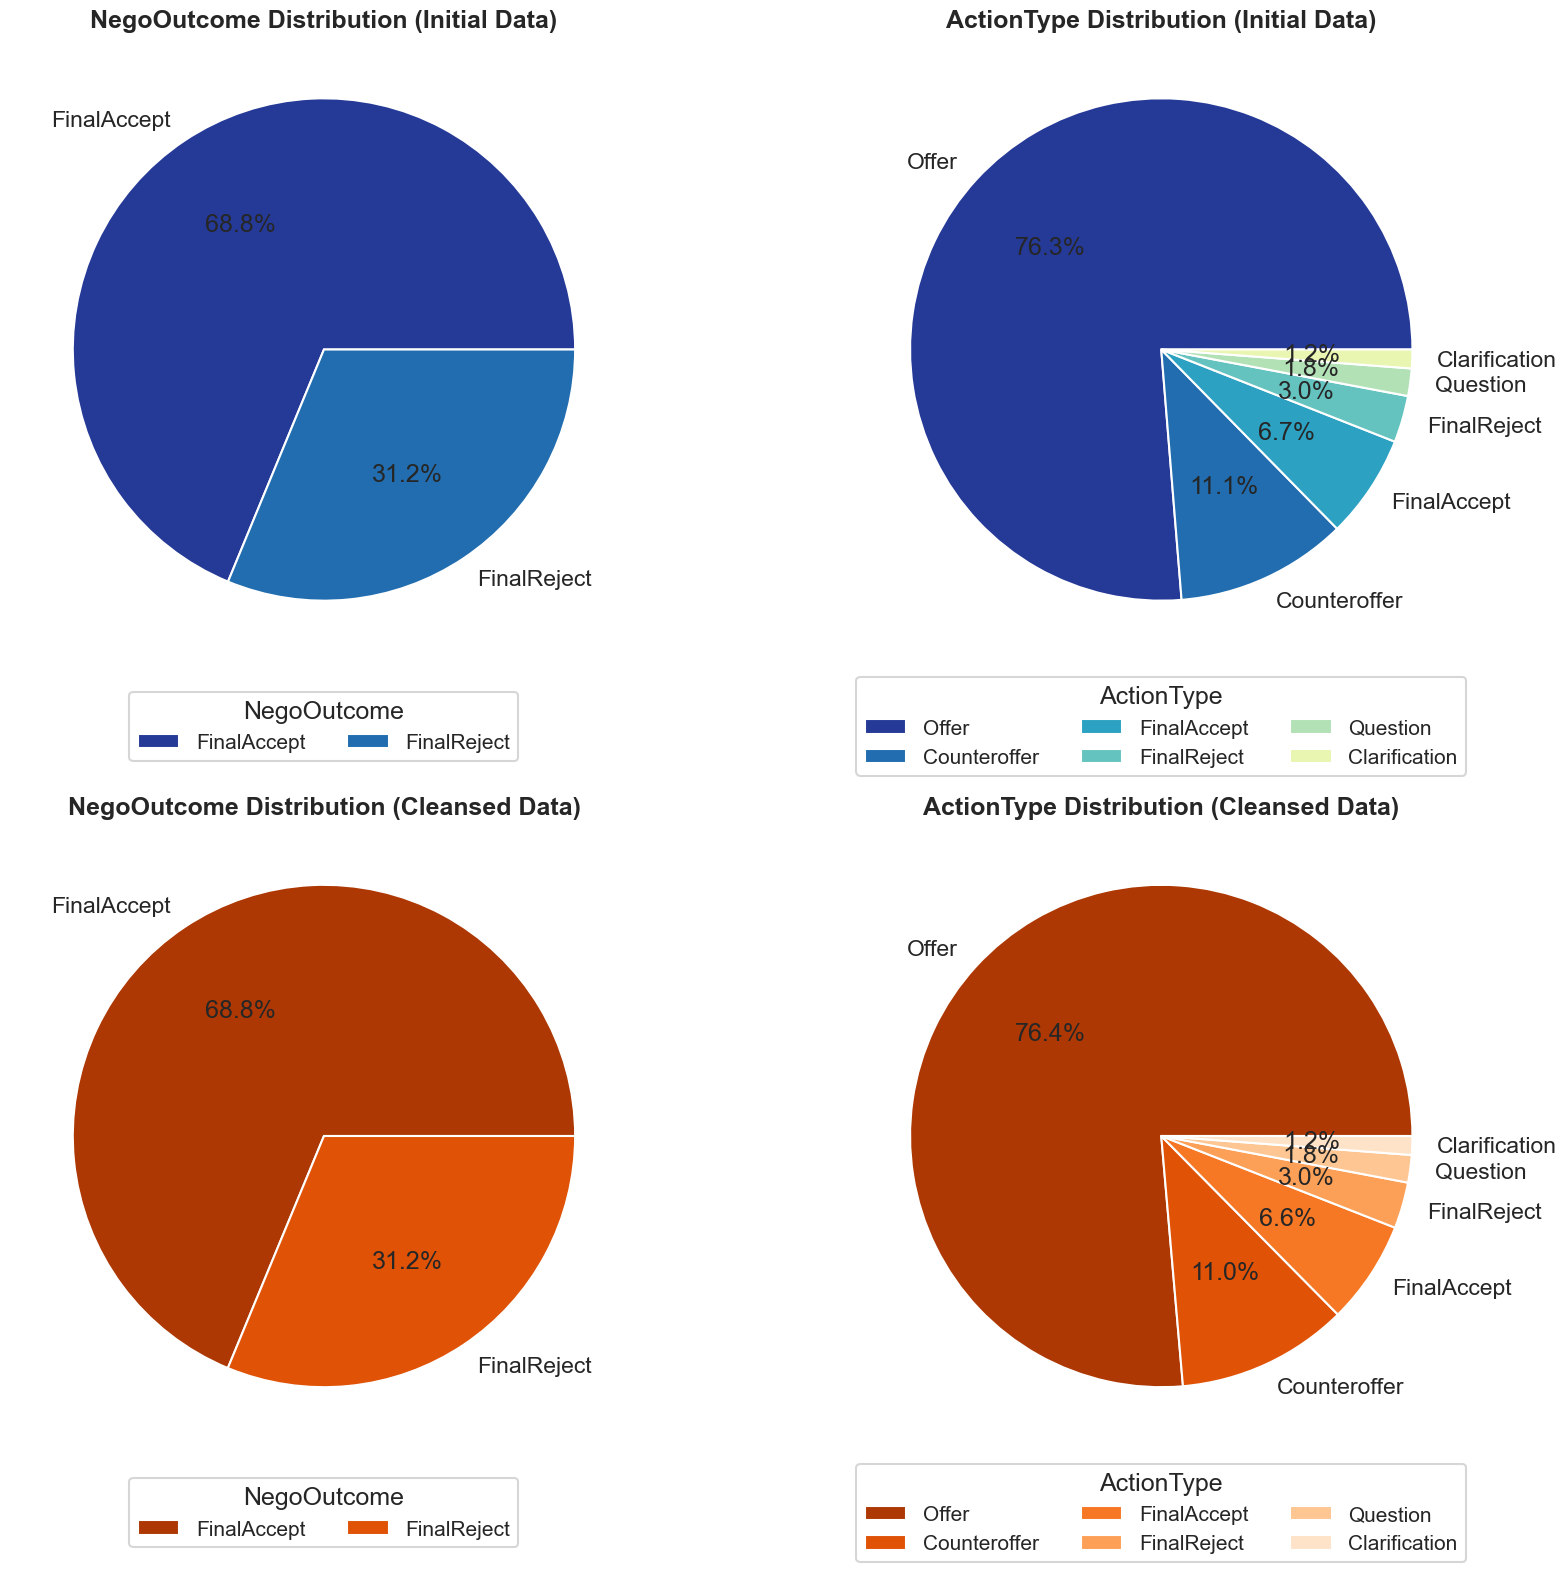

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a color palette from colorbrewer and reverse it
colors = sns.color_palette("YlGnBu")[::-1]
colors2 = sns.color_palette("Oranges")[::-1]

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Create a figure with subplots
plt.figure(figsize=(18, 16))

# Plot for NegoOutcome in initial_data
plt.subplot(2, 2, 1)
plt.pie(initial_data['NegoOutcome'].value_counts(), labels=initial_data['NegoOutcome'].unique().tolist(), autopct='%1.1f%%', colors=colors)
plt.title('NegoOutcome Distribution (Initial Data)', fontweight='bold')
plt.legend(title="NegoOutcome", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize='small')

# Plot for ActionType in initial_data
plt.subplot(2, 2, 2)
plt.pie(initial_data['ActionType'].value_counts(), labels=initial_data['ActionType'].unique().tolist(), autopct='%1.1f%%', colors=colors)
plt.title('ActionType Distribution (Initial Data)', fontweight='bold')
plt.legend(title="ActionType", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize='small')

# Plot for NegoOutcome in cleansed_data
plt.subplot(2, 2, 3)
plt.pie(cleansed_data['NegoOutcome'].value_counts(), labels=cleansed_data['NegoOutcome'].unique().tolist(), autopct='%1.1f%%', colors=colors2)
plt.title('NegoOutcome Distribution (Cleansed Data)', fontweight='bold')
plt.legend(title="NegoOutcome", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize='small')

# Plot for ActionType in cleansed_data
plt.subplot(2, 2, 4)
plt.pie(cleansed_data['ActionType'].value_counts(), labels=cleansed_data['ActionType'].unique().tolist(), autopct='%1.1f%%', colors=colors2)
plt.title('ActionType Distribution (Cleansed Data)', fontweight='bold')
plt.legend(title="ActionType", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize='small')

# Adjust layout
plt.tight_layout()
plt.show()

<p style="text-align: justify;">
Now, when comparing the pie charts, there is no significant difference since the overall relations and weightings remain the same. However, the proportion of offers increased by 0.1% in the cleansed dataset.
</p>

In [14]:
# Look into the acceptance and rejection messages
accepted_messages = initial_data[initial_data["NegoOutcome"] == "FinalAccept"]["Content"]
rejected_messages = initial_data[initial_data["NegoOutcome"] == "FinalReject"]["Content"]

# Look into the acceptance and rejection messages for cleansed data
accepted_messages_cleansed = cleansed_data[cleansed_data["NegoOutcome"] == "FinalAccept"]["Content"]
rejected_messages_cleansed = cleansed_data[cleansed_data["NegoOutcome"] == "FinalReject"]["Content"]

# Print accepted message
accepted_messages.values[1]

"Dear Mr. Novak, \nThank you for reaching out to me!I apologize for the slight delay in getting back to you, my colleagues and I are in the midst of preparing for our upcoming joint venture and we couldn't be more excited! As you already know, my name is Finn Mendel and I will be your correspondence for this period of time of solidifying the agreements between Hurm AG and SVN Tech respectively. \nI have read your proposal for the open issues of our joint venture, however I have some thoughts on what you have discussed. Below is my explanation:\xa0 \n \n Directors \n \nWhile we have agreed on the 5 members with a simple majority power, we believe having 4 members from Hurm AG will be more suitable for this venture. This is because our directors are extremely experienced and have completed multiple joint ventures before with other European countries. However, we will need 1 from SVN Tech for, as you mentioned previously, to deal with local authorities and partners successfully.\xa0 \n \n

In [15]:
# Print accepted message
accepted_messages_cleansed.values[1]

'reaching mei apologize slight delay getting back colleague midst preparing upcoming joint venture could nt excited already know name mendes correspondence period time solidifying agreement harm ag respectively read proposal open issue joint venture however thought discussed explanation director agreed member simple majority power believe member harm ag suitable venture director extremely experienced completed multiple joint venture european country however need mentioned previously deal local authority partner successfully engineer fully agree send swiss engineer svn tech interest push development green spirit engine however prior commitment local production fact far home propose work additional month together improve product common worker agree u continue paying worker however believe worker specially hired joint venture paid equal term company additionally would appreciate much commonly hired worker could paid slovenia worker heard good reputation providing great working condition w

In [16]:
# Print rejected message
rejected_messages.values[1]

'Dear Mr Novak, \nI am pleased to hear that you are happy about the joint venture because so are we at Hurm AG. I would like to thank you in advance for stipulating your points of discussion for us to make this partnership a reality. \nIn regards to the "board of directors", I would like Hurm AG to have 4 seats in the board. Since it is important for our company to carry the vision of our company throughout the project till its final stage of course with the help of SVN Tech representative in the board to provide the support and knowhow to realize our vision. \nIn regards to our engineers stay in Slovenia, it is impossible for them to stay that long due to their production commitments here Switzerland to ensure the success of our joint project. If needed, our engineers can stay in Slovenia for a maximum of 6 months to help to start the project and eventually train the staff. As for the additional compensation of the workers I do agree with the 15% paid by SVN proposed by you. \nFor the

In [17]:
# Print accepted message
rejected_messages_cleansed.values[1]

'pleased hear happy joint venture harm ag would like advance stimulating point discussion u make partnership reality board director would like harm ag seat board since important company carry vision company throughout project till final stage course help representative board provide support knowhow realize vision engineer stay slovenia impossible stay long due production commitment switzerland ensure success joint project needed engineer stay slovenia maximum month help start project eventually train staff additional compensation worker agree paid proposed remaining issue would like propose jurisdiction handled court switzerland propose pay wage additional staff hired project paid equal term bus harm ag however avoid unnecessary administrative effort would like wage payment hired worker would administrated please question concern regarding position please hesitate ask important u together reach mutual understanding party benefit joint venture'

<p style="text-align: justify;">
Notable differences between the initial messages and cleansed messages include the removal of characters such as "!", ",", ".", and "/". Additionally, openings like "Dear Mr." and names like "Novak" are missing, indicating that the cleansing process worked correctly. Autocorrection also worked, as "stipulated" was converted to "stimulated," showing that preprocessing was effective. Lowercasing was applied, but organizations were not completely removed; for example, "Hurm AG" is still present but in lowercase, and "US" was changed to "u," possibly due to lemmatization or tokenization.
</p>

## **<span style="color: orange;">Overall important KPI's</span>**

In [18]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Ensure the necessary NLTK resources are downloaded (if not already)
nltk.download('punkt')

# Apply word_tokenize to count words
def word_count_nltk(text):
    # Tokenize the text and count the number of tokens (words)
    tokens = word_tokenize(text)
    return len(tokens)

# Function to process dataset and calculate word counts
def calculate_word_counts(df, dataset_name):
    # Look into the acceptance and rejection messages
    accepted_messages = df[df["NegoOutcome"] == "FinalAccept"]["Content"]
    rejected_messages = df[df["NegoOutcome"] == "FinalReject"]["Content"]

    # Calculate the total word count for accepted messages
    accepted_word_count_sum = accepted_messages.apply(word_count_nltk).sum()

    # Calculate the total word count for rejected messages
    rejected_word_count_sum = rejected_messages.apply(word_count_nltk).sum()

    # Calculate the overall total word count
    total_word_count_sum = accepted_word_count_sum + rejected_word_count_sum

    # Calculate the percentage of words in accepted and rejected messages
    if total_word_count_sum > 0:
        accepted_word_count_percentage = (accepted_word_count_sum / total_word_count_sum) * 100
        rejected_word_count_percentage = (rejected_word_count_sum / total_word_count_sum) * 100
    else:
        accepted_word_count_percentage = 0
        rejected_word_count_percentage = 0

    # Create a DataFrame to display the results
    word_count_data = {
        'Dataset': [dataset_name],
        'Accepted Word Count': [accepted_word_count_sum],
        'Rejected Word Count': [rejected_word_count_sum],
        'Total Word Count': [total_word_count_sum],
        'Accepted Word Count (%)': [accepted_word_count_percentage],
        'Rejected Word Count (%)': [rejected_word_count_percentage]
    }

    return pd.DataFrame(word_count_data)

# Process both datasets
word_count_df_initial = calculate_word_counts(initial_data, 'Initial Data')
word_count_df_cleansed = calculate_word_counts(cleansed_data, 'Cleansed Data')

# Combine the results into a single DataFrame
word_count_df = pd.concat([word_count_df_initial, word_count_df_cleansed], ignore_index=True)

# Display the results
word_count_df

[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Dataset,Accepted Word Count,Rejected Word Count,Total Word Count,Accepted Word Count (%),Rejected Word Count (%)
0,Initial Data,389223,207280,596503,65.250803,34.749197
1,Cleansed Data,160632,85702,246334,65.209025,34.790975


In [19]:

# Calculate the differences in word counts and percentages
accepted_word_count_diff = word_count_df_cleansed['Accepted Word Count'].values[0] - word_count_df_initial['Accepted Word Count'].values[0]
rejected_word_count_diff = word_count_df_cleansed['Rejected Word Count'].values[0] - word_count_df_initial['Rejected Word Count'].values[0]
total_word_count_diff = word_count_df_cleansed['Total Word Count'].values[0] - word_count_df_initial['Total Word Count'].values[0]

accepted_word_count_percentage_diff = word_count_df_cleansed['Accepted Word Count (%)'].values[0] - word_count_df_initial['Accepted Word Count (%)'].values[0]
rejected_word_count_percentage_diff = word_count_df_cleansed['Rejected Word Count (%)'].values[0] - word_count_df_initial['Rejected Word Count (%)'].values[0]

# Calculate the change in percentage for the absolute word counts
accepted_word_count_change_percentage = (accepted_word_count_diff / word_count_df_initial['Accepted Word Count'].values[0]) * 100
rejected_word_count_change_percentage = (rejected_word_count_diff / word_count_df_initial['Rejected Word Count'].values[0]) * 100
total_word_count_change_percentage = (total_word_count_diff / word_count_df_initial['Total Word Count'].values[0]) * 100

# Create a DataFrame to display the differences
word_count_diff_data = {
    'Accepted Word Count (%) Difference': [accepted_word_count_percentage_diff],
    'Rejected Word Count (%) Difference': [rejected_word_count_percentage_diff],
    'Accepted Word Count Change (%)': [accepted_word_count_change_percentage],
    'Rejected Word Count Change (%)': [rejected_word_count_change_percentage],
    'Total Word Count Change (%)': [total_word_count_change_percentage]
}

word_count_diff_df = pd.DataFrame(word_count_diff_data)
word_count_diff_df

,Accepted Word Count (%) Difference,Rejected Word Count (%) Difference,Accepted Word Count Change (%),Rejected Word Count Change (%),Total Word Count Change (%)
0,-0.041778,0.041778,-58.730085,-58.653995,-58.703644


<p style="text-align: justify;">

The accepted word count decreased by **<span style="color: teal;">58.7%</span>**.
The rejected word count decreased by **<span style="color: teal;">58.6%</span>**.
The total word count decreased by **<span style="color: teal;">58.7%</span>**.
so basically the cleansed dataset was more than halfed down related to its word count because of the cleansing part.

The proportion of accepted words decreased by **<span style="color: teal;">0.03%</span>**.
The proportion of rejected words increased by **<span style="color: teal;">0.3%</span>**.
These changes indicate that the cleansing process significantly reduced the overall word count while maintaining a relatively consistent distribution between accepted and rejected messages.
</p>

### **<span style="color: orange;">Calculating Average Lengths</span>**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from matplotlib.lines import Line2D

nltk.download('punkt')

def process_dataset(df, dataset_name):
    # Adding additional parameters to the current df based on the nltk library
    df['Content_Length'] = df['Content'].apply(len)
    df['Sentence_Count'] = df['Content'].apply(lambda x: len(sent_tokenize(x))) # using sent_tokenize to get the sentence count
    df['Word_Count_nltk'] = df['Content'].apply(lambda x: len(word_tokenize(x))) # using word_tokenize to get the word count

    # Calculate averages
    average_content_length = df['Content_Length'].mean()
    average_sentence_length = df['Content_Length'].sum() / df['Sentence_Count'].sum()
    average_word_length = df['Content_Length'].sum() / df['Word_Count_nltk'].sum()

    print(f"{dataset_name} - Average Content Length: {average_content_length}")
    print(f"{dataset_name} - Average Sentence Length: {average_sentence_length}")
    print(f"{dataset_name} - Average Word Length: {average_word_length}")

    return df

# Process both datasets
initial_data = process_dataset(initial_data, 'Initial Data')
cleansed_data = process_dataset(cleansed_data, 'Cleansed Data')

[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Initial Data - Average Content Length: 1291.5955249569708
Initial Data - Average Sentence Length: 98.42825288562435
Initial Data - Average Word Length: 5.032108807499711
Cleansed Data - Average Content Length: 759.7689655172413
Cleansed Data - Average Sentence Length: 759.7689655172413
Cleansed Data - Average Word Length: 7.1555855058579


<p style="text-align: justify;">

The results show that after cleansing and removing stopwords, the average word length increases to **<span style="color: teal;">nearly 7.17</span>**, while the average content length decreases to **<span style="color: teal;">approx. 761.57</span>**. The sentence length is equal to the content length because periods were removed, causing the separation of sentences to disappear, and the entire message is seen as one long sentence.

</p>

In [21]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from matplotlib.lines import Line2D

nltk.download('punkt')

def process_dataset(df, dataset_name):
    # Adding additional parameters to the current df based on the nltk library
    df['Content_Length'] = df['Content'].apply(len)
    df['Sentence_Count'] = df['Content'].apply(lambda x: len(sent_tokenize(x))) # using sent_tokenize to get the sentence count
    df['Word_Count_nltk'] = df['Content'].apply(lambda x: len(word_tokenize(x))) # using word_tokenize to get the word count

    # Calculate averages for accepted and rejected content
    average_content_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Content_Length'].mean()
    average_content_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Content_Length'].mean()
    average_sentence_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Sentence_Count'].mean()
    average_sentence_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Sentence_Count'].mean()
    average_word_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Word_Count_nltk'].mean()
    average_word_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Word_Count_nltk'].mean()

    # Calculate overall averages
    average_content_length_overall = df['Content_Length'].mean()
    average_sentence_length_overall = df['Sentence_Count'].mean()
    average_word_length_overall = df['Word_Count_nltk'].mean()

    print(f"{dataset_name} - Average Content Length (Accepted): {average_content_length_accepted}")
    print(f"{dataset_name} - Average Content Length (Rejected): {average_content_length_rejected}")
    print(f"{dataset_name} - Average Sentence Length (Accepted): {average_sentence_length_accepted}")
    print(f"{dataset_name} - Average Sentence Length (Rejected): {average_sentence_length_rejected}")
    print(f"{dataset_name} - Average Word Length (Accepted): {average_word_length_accepted}")
    print(f"{dataset_name} - Average Word Length (Rejected): {average_word_length_rejected}")
    print(f"{dataset_name} - Average Content Length (Overall): {average_content_length_overall}")
    print(f"{dataset_name} - Average Sentence Length (Overall): {average_sentence_length_overall}")
    print(f"{dataset_name} - Average Word Length (Overall): {average_word_length_overall}")

    return df, average_content_length_accepted, average_content_length_rejected, average_content_length_overall, average_sentence_length_accepted, average_sentence_length_rejected, average_sentence_length_overall, average_word_length_accepted, average_word_length_rejected, average_word_length_overall

# Process both datasets
initial_data, initial_avg_content_length_accepted, initial_avg_content_length_rejected, initial_avg_content_length_overall, initial_avg_sentence_length_accepted, initial_avg_sentence_length_rejected, initial_avg_sentence_length_overall, initial_avg_word_length_accepted, initial_avg_word_length_rejected, initial_avg_word_length_overall = process_dataset(initial_data, 'Initial Data')


[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Initial Data - Average Content Length (Accepted): 1224.497496871089
Initial Data - Average Content Length (Rejected): 1439.2851239669421
Initial Data - Average Sentence Length (Accepted): 12.412390488110137
Initial Data - Average Sentence Length (Rejected): 14.68457300275482
Initial Data - Average Word Length (Accepted): 243.56883604505632
Initial Data - Average Word Length (Rejected): 285.5096418732782
Initial Data - Average Content Length (Overall): 1291.5955249569708
Initial Data - Average Sentence Length (Overall): 13.122203098106713
Initial Data - Average Word Length (Overall): 256.67082616179


In [22]:
# create a copable dataframe out of the results
initial_data_results = pd.DataFrame({
    'Dataset': ['Initial Data'],
    'Accepted Content Length': [initial_avg_content_length_accepted],
    'Rejected Content Length': [initial_avg_content_length_rejected],
    'Overall Content Length': [initial_avg_content_length_overall],
    'Accepted Sentence Length': [initial_avg_sentence_length_accepted],
    'Rejected Sentence Length': [initial_avg_sentence_length_rejected],
    'Overall Sentence Length': [initial_avg_sentence_length_overall],
    'Accepted Word Length': [initial_avg_word_length_accepted],
    'Rejected Word Length': [initial_avg_word_length_rejected],
    'Overall Word Length': [initial_avg_word_length_overall]
})

initial_data_results

,Dataset,Accepted Content Length,Rejected Content Length,Overall Content Length,Accepted Sentence Length,Rejected Sentence Length,Overall Sentence Length,Accepted Word Length,Rejected Word Length,Overall Word Length
0,Initial Data,1224.497497,1439.285124,1291.595525,12.41239,14.684573,13.122203,243.568836,285.509642,256.670826


In [23]:
cleansed_data, cleansed_avg_content_length_accepted, cleansed_avg_content_length_rejected, cleansed_avg_content_length_overall, cleansed_avg_sentence_length_accepted, cleansed_avg_sentence_length_rejected, cleansed_avg_sentence_length_overall, cleansed_avg_word_length_accepted, cleansed_avg_word_length_rejected, cleansed_avg_word_length_overall = process_dataset(cleansed_data, 'Cleansed Data')


Cleansed Data - Average Content Length (Accepted): 719.7253918495297
Cleansed Data - Average Content Length (Rejected): 847.8648275862068
Cleansed Data - Average Sentence Length (Accepted): 1.0
Cleansed Data - Average Sentence Length (Rejected): 1.0
Cleansed Data - Average Word Length (Accepted): 100.70971786833856
Cleansed Data - Average Word Length (Rejected): 118.20965517241379
Cleansed Data - Average Content Length (Overall): 759.7689655172413
Cleansed Data - Average Sentence Length (Overall): 1.0
Cleansed Data - Average Word Length (Overall): 106.17844827586207


In [24]:
# create a copable dataframe out of the results
cleansed_data_results = pd.DataFrame({
    'Dataset': ['Cleansed Data'],
    'Accepted Content Length': [cleansed_avg_content_length_accepted],
    'Rejected Content Length': [cleansed_avg_content_length_rejected],
    'Overall Content Length': [cleansed_avg_content_length_overall],
    'Accepted Sentence Length': [cleansed_avg_sentence_length_accepted],
    'Rejected Sentence Length': [cleansed_avg_sentence_length_rejected],
    'Overall Sentence Length': [cleansed_avg_sentence_length_overall],
    'Accepted Word Length': [cleansed_avg_word_length_accepted],
    'Rejected Word Length': [cleansed_avg_word_length_rejected],
    'Overall Word Length': [cleansed_avg_word_length_overall]
})

cleansed_data_results

,Dataset,Accepted Content Length,Rejected Content Length,Overall Content Length,Accepted Sentence Length,Rejected Sentence Length,Overall Sentence Length,Accepted Word Length,Rejected Word Length,Overall Word Length
0,Cleansed Data,719.725392,847.864828,759.768966,1.0,1.0,1.0,100.709718,118.209655,106.178448


<p style="text-align: justify;">

Instead of plotting the graphs again like in the exploration in part 1 of the project, we will only show the noticeable changes in the content length averages. The trend remained the same since the distribution of outcomes was nearly unchanged. However, due to the removal of certain elements, a significant change in average length was measured, as printed above. As already mentioned, sentences now have a count of **<span style="color: teal;">1</span>** because they are seen as one big message since the periods were removed, thus eliminating the separation of each sentence. The word count also decreased immensely, from **<span style="color: teal;">256.67</span>** to **<span style="color: teal;">106.3</span>**. These differences were expected due to the removal of stopwords, names, and also openings and closings, as they constitute a significant portion of the messages.
</p>

In [25]:
# calculate the percentual change between initial and cleansed length
content_length_change = (cleansed_avg_content_length_overall - initial_avg_content_length_overall) / initial_avg_content_length_overall * 100
sentence_length_change = (cleansed_avg_sentence_length_overall - initial_avg_sentence_length_overall) / initial_avg_sentence_length_overall * 100
word_length_change = (cleansed_avg_word_length_overall - initial_avg_word_length_overall) / initial_avg_word_length_overall * 100

# create a copable dataframe out of the results
length_results = pd.DataFrame({
    'Dataset': ['Compared Data'],
    'Content Length Change (%)': [content_length_change],
    'Sentence Length Change (%)': [sentence_length_change],
    'Word Length Change (%)': [word_length_change]
})

length_results

,Dataset,Content Length Change (%),Sentence Length Change (%),Word Length Change (%)
0,Compared Data,-41.175937,-92.379328,-58.632444


In [26]:
# now add all 3 results in one dataframe
results_lengths = pd.concat([initial_data_results, cleansed_data_results, length_results], ignore_index=True)
results_lengths

,Dataset,Accepted Content Length,Rejected Content Length,Overall Content Length,Accepted Sentence Length,Rejected Sentence Length,Overall Sentence Length,Accepted Word Length,Rejected Word Length,Overall Word Length,Content Length Change (%),Sentence Length Change (%),Word Length Change (%)
0,Initial Data,1224.497497,1439.285124,1291.595525,12.41239,14.684573,13.122203,243.568836,285.509642,256.670826,NaN,NaN,NaN
1,Cleansed Data,719.725392,847.864828,759.768966,1.00000,1.000000,1.000000,100.709718,118.209655,106.178448,NaN,NaN,NaN
2,Compared Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-41.175937,-92.379328,-58.632444


As we can see, there is a decrease of approximately 41% in the average overall content length and a 59% decrease in the average word length. Sentence length can be ignored since, after cleansing, all periods (".") are removed, and the content is counted as one big message.

In [27]:
# Ensure scikit-learn is installed
# %pip install scikit-learn

# Add NegoOutcomeLabel to initial_data
initial_data["NegoOutcomeLabel"] = initial_data["NegoOutcome"].map({"FinalAccept": 1, "FinalReject": 0})
print("Initial Data:")
initial_data.head()

Initial Data:


,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429,2529,17,470,1
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439,2579,21,483,1
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409,2336,15,454,1
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345,1961,13,381,1
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343,1917,10,376,1


In [28]:
# Add NegoOutcomeLabel to cleansed_data
cleansed_data["NegoOutcomeLabel"] = cleansed_data["NegoOutcome"].map({"FinalAccept": 1, "FinalReject": 0})
print("Cleansed Data:")
cleansed_data.head()

Cleansed Data:


,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel
0,70,69,Offer,FinalAccept,hope well management company agreed building f...,1635,219,1635,1,219,1
1,69,70,Counteroffer,FinalAccept,reaching mei apologize slight delay getting ba...,1462,197,1462,1,197,1
2,70,69,Counteroffer,FinalAccept,r kind response need hurry guess face daily fi...,1465,195,1465,1,195,1
3,69,70,Counteroffer,FinalAccept,swift reply read second set proposal discussed...,1104,148,1104,1,148,1
4,70,69,Counteroffer,FinalAccept,proposal effort far seems getting close resolv...,1153,154,1153,1,154,1


### **<span style="color: orange;"> Word Cloud  </span>**

In [29]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


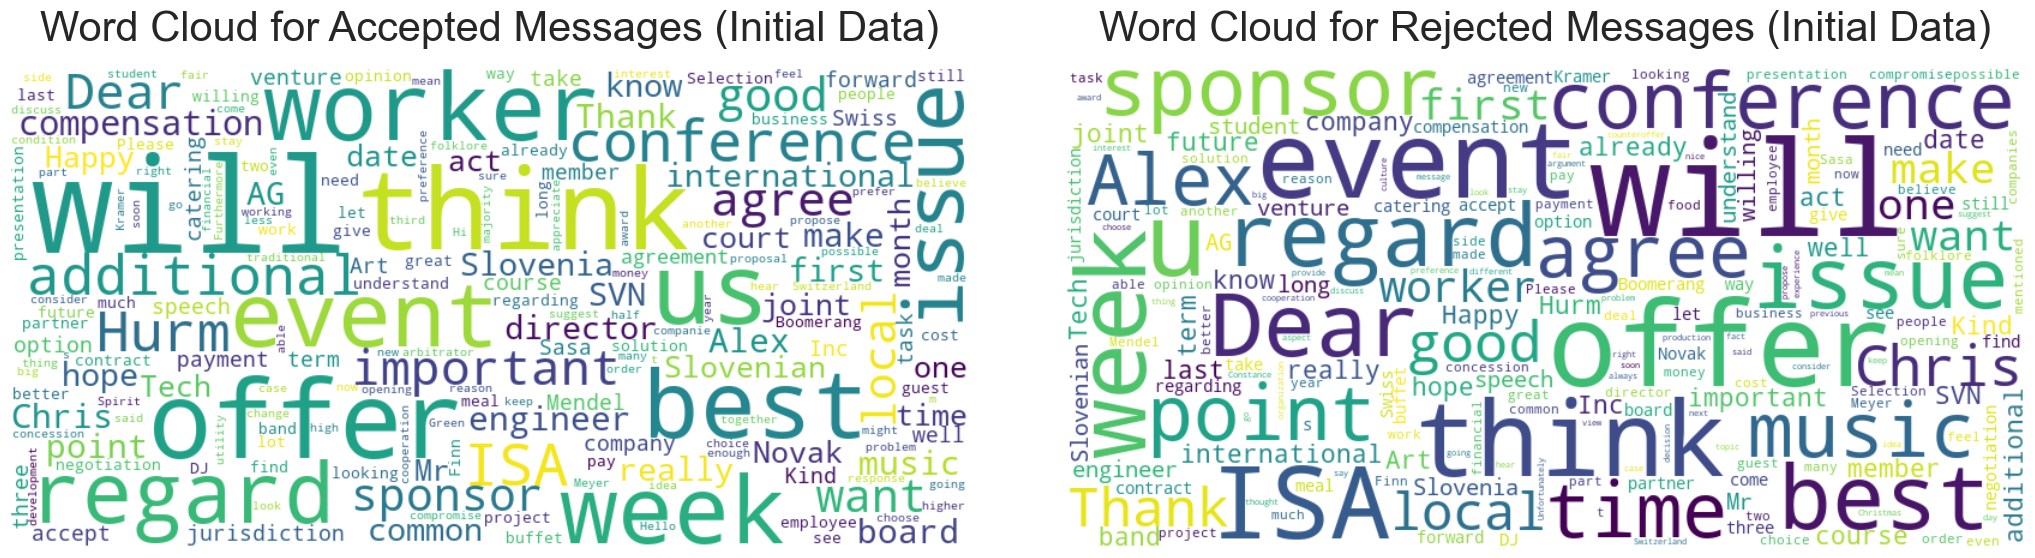

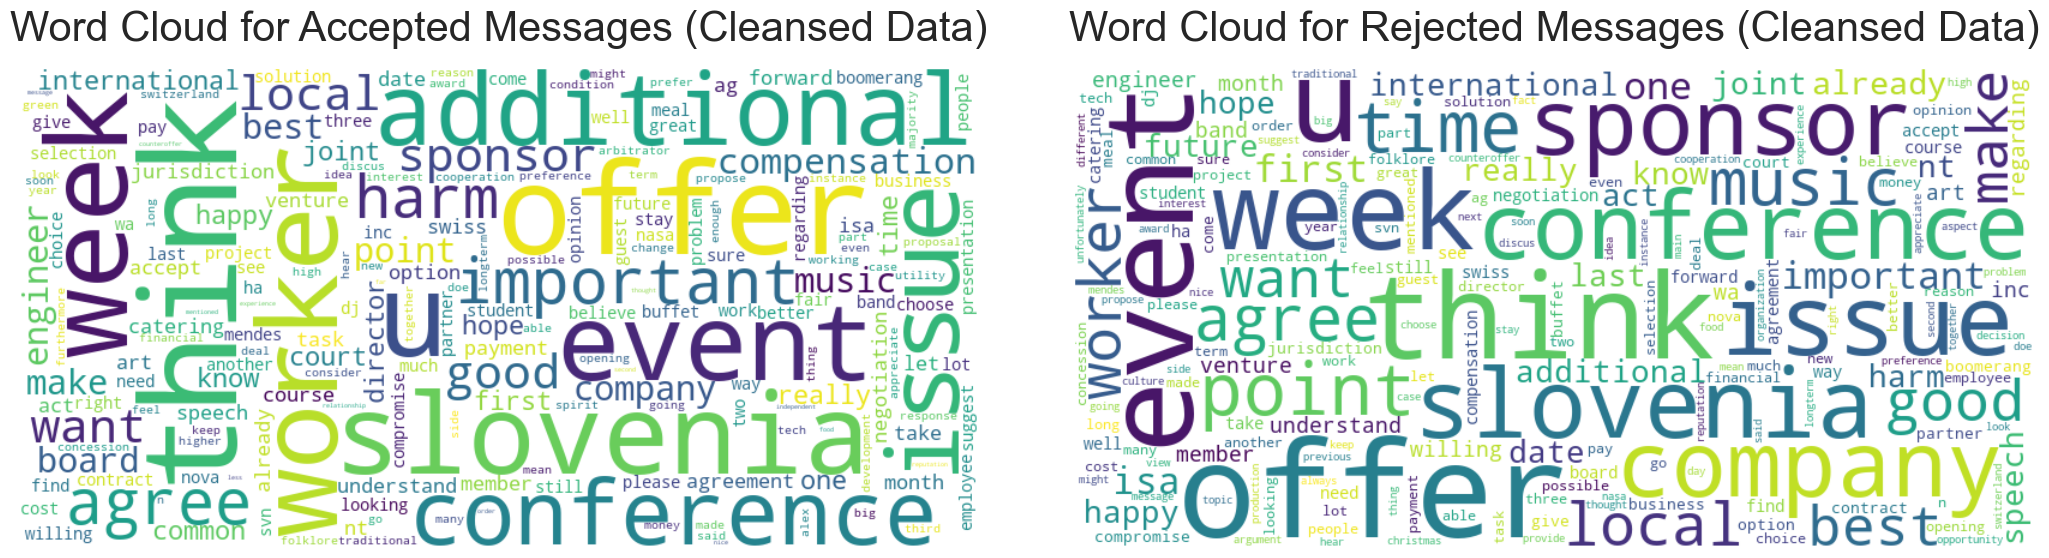

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordclouds(df, title_suffix):
    # Look into the acceptance and rejection messages
    accepted_messages = df[df["NegoOutcome"] == "FinalAccept"]["Content"]
    rejected_messages = df[df["NegoOutcome"] == "FinalReject"]["Content"]

    # Create a word cloud separately for accepted and rejected messages
    wordcloud_accepted = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='white').generate(' '.join(accepted_messages))
    wordcloud_rejected = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='white').generate(' '.join(rejected_messages))

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 8), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})

    # Plot the word clouds
    ax1.imshow(wordcloud_accepted, interpolation='bilinear')
    ax1.set_title(f'Word Cloud for Accepted Messages ({title_suffix})', fontsize=30, pad=20)
    ax1.axis('off')
    ax1.spines['top'].set_visible(True)
    ax1.spines['right'].set_visible(True)
    ax1.spines['bottom'].set_visible(True)
    ax1.spines['left'].set_visible(True)

    ax2.imshow(wordcloud_rejected, interpolation='bilinear')
    ax2.set_title(f'Word Cloud for Rejected Messages ({title_suffix})', fontsize=30, pad=20)
    ax2.axis('off')
    ax2.spines['top'].set_visible(True)
    ax2.spines['right'].set_visible(True)
    ax2.spines['bottom'].set_visible(True)
    ax2.spines['left'].set_visible(True)

    plt.show()

# Generate word clouds for both datasets
generate_wordclouds(initial_data, "Initial Data")
generate_wordclouds(cleansed_data, "Cleansed Data")

<p style="text-align: justify;">

#### Before Pre-Processing
- The initial word clouds contained terms like **<span style="color: teal;">"Dear," "Alex," and "Chris"</span>**, which appear to be personal names or formal opening words. These likely added noise to the analysis since they do not contribute significant meaning to the context of the messages.
- Words such as **<span style="color: teal;">"Finn," "Swiss," and "Slovenia"</span>** appeared more prominently. These may represent specific instances or contextual mentions that are less relevant to the generalized analysis.
- There may have been inconsistencies in word cases or formatting that affected the frequency calculations.
- Common words like **<span style="color: teal;">"will" and "us"</span>** were prominently displayed, suggesting that stop words were not removed.

#### After Pre-Processing
- These noisy and non-contextual terms (e.g., **<span style="color: teal;">"Dear," "Alex," "Chris"</span>**) have been removed, making the word clouds more focused on relevant terms like **<span style="color: teal;">"conference," "important," "offer," and "sponsor"</span>**.
- Words related to the context of the messages (e.g., **<span style="color: teal;">"offer," "important," "issue"</span>**) are emphasized, which likely improves the utility of the analysis by focusing on meaningful terms.
- Standardization has likely aligned words to the same case (e.g., lowercase), making frequency counts more accurate.
- The prominence of such terms has decreased, indicating stop word removal, which enhances the interpretability of key terms.

### Similarities
Core thematic words like **<span style="color: teal;">"conference," "offer," "important," "worker," "agree," and "event"</span>** are still central to both word clouds, showing that preprocessing retained the essential topics and context of the messages. Both "accepted" and "rejected" categories still maintain their unique focus, with certain terms like **<span style="color: teal;">"music" and "sponsor"</span>** being more prominent in rejected messages.

### Changes
- Unnecessary and repetitive terms were removed, improving the clarity of the visualization.
- More weight is given to meaningful, context-specific terms, highlighting the semantic essence of the messages.
- Irrelevant entities and artifacts (e.g., names, formalities) no longer obscure the interpretation.

The pre-processing steps significantly enhanced the analytical clarity of the word clouds by filtering noise, standardizing the text, and focusing on relevant terms. This makes it easier to derive actionable insights from the data. The thematic consistency between pre- and post-processed clouds indicates that preprocessing did not distort the primary message content but rather refined it for better analysis.
</p>

## **<span style="color: orange;"> Topic modeling exploration with pyLDAvis </span>**
<p style="text-align: justify;">
</p>



Now, for the topic LDA modeling, we will only run the cleansed data as the interactive plot takes a while. If you want to compare it further with the initial data, you can look at the initial data from the previous notebook file or change the dataframe in the code to initial_data.

In [31]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [32]:
import ssl
import nltk
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
from gensim import corpora
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def preprocess_df(df):
    corpus = []
    lem = WordNetLemmatizer()
    stop = set(stopwords.words('english'))
    for content in df['Content']:
        words = [w for w in word_tokenize(content) if (w.lower() not in stop)]
        words = [lem.lemmatize(w) for w in words if len(w) > 2]
        corpus.append(words)
    return corpus

[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\TColt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TColt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
# Preprocess the cleansed data
corpus = preprocess_df(cleansed_data)

In [35]:
# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]

In [36]:
# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word=dictionary, passes=15)

In [37]:
# Install pyLDAvis if not already installed
%pip install pyLDAvis

# Visualize the topics using PyLDAvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyLDAvis in c:\users\tcolt\appdata\local\programs\python\python312\lib\site-packages (3.4.1)



<p style="text-align: justify;">

It's already evident that the most common words in each topic are words like **<span style="color: teal;">"would"</span>**, **<span style="color: teal;">"offer"</span>**, etc. Now the distribution makes more sense after stopwords, names, and closing and opening phrases were removed. It got limited to the relevant words that may impact the final decision, and this will possibly help us in the modeling phase.
</p>

### **<span style="color: orange;"> N-gram exploration </span>**
N-grams are simply contiguous sequences of n words. For example. We will look into the most frequent n-grams to see if we can find any pattern that may help us understand the data better

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=3):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 20 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Create a custom color palette
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]  # Reverse the palette

    # Plot the n-grams
    fig, ax = plt.subplots(figsize=(12, 6))
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=ax, color=colors[:len(ngram_df)])
    ax.invert_yaxis()
    ax.set_xlabel("Frequency")
    ax.set_title(f"Top {n}-grams")
    plt.show()

    return words_freq, sum_words

In [39]:
# Function to create subplots for accepted and rejected messages
def create_subplots(df1, df2, n=2):
    accepted_messages_initial = df1[df1["NegoOutcome"] == "FinalAccept"]["Content"]
    rejected_messages_initial = df1[df1["NegoOutcome"] == "FinalReject"]["Content"]
    accepted_messages_cleansed = df2[df2["NegoOutcome"] == "FinalAccept"]["Content"]
    rejected_messages_cleansed = df2[df2["NegoOutcome"] == "FinalReject"]["Content"]

    # Create subplots for accepted messages
    fig, axes = plt.subplots(1, 2, figsize=(48, 12))
    fig.suptitle('Top n-grams in Accepted Messages', fontsize=20)

    # Plot for initial data
    corpus = accepted_messages_initial.tolist()
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=axes[0], color=colors[:len(ngram_df)])
    axes[0].invert_yaxis()
    axes[0].set_xlabel("Frequency")
    axes[0].set_title("Initial Data")

    # Plot for cleansed data
    corpus = accepted_messages_cleansed.tolist()
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=axes[1], color=colors[:len(ngram_df)])
    axes[1].invert_yaxis()
    axes[1].set_xlabel("Frequency")
    axes[1].set_title("Cleansed Data")

    plt.show()

    # Create subplots for rejected messages
    fig, axes = plt.subplots(1, 2, figsize=(48, 12))
    fig.suptitle('Top n-grams in Rejected Messages', fontsize=20)

    # Plot for initial data
    corpus = rejected_messages_initial.tolist()
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=axes[0], color=colors[:len(ngram_df)])
    axes[0].invert_yaxis()
    axes[0].set_xlabel("Frequency")
    axes[0].set_title("Initial Data")

    # Plot for cleansed data
    corpus = rejected_messages_cleansed.tolist()
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=axes[1], color=colors[:len(ngram_df)])
    axes[1].invert_yaxis()
    axes[1].set_xlabel("Frequency")
    axes[1].set_title("Cleansed Data")

    plt.show()

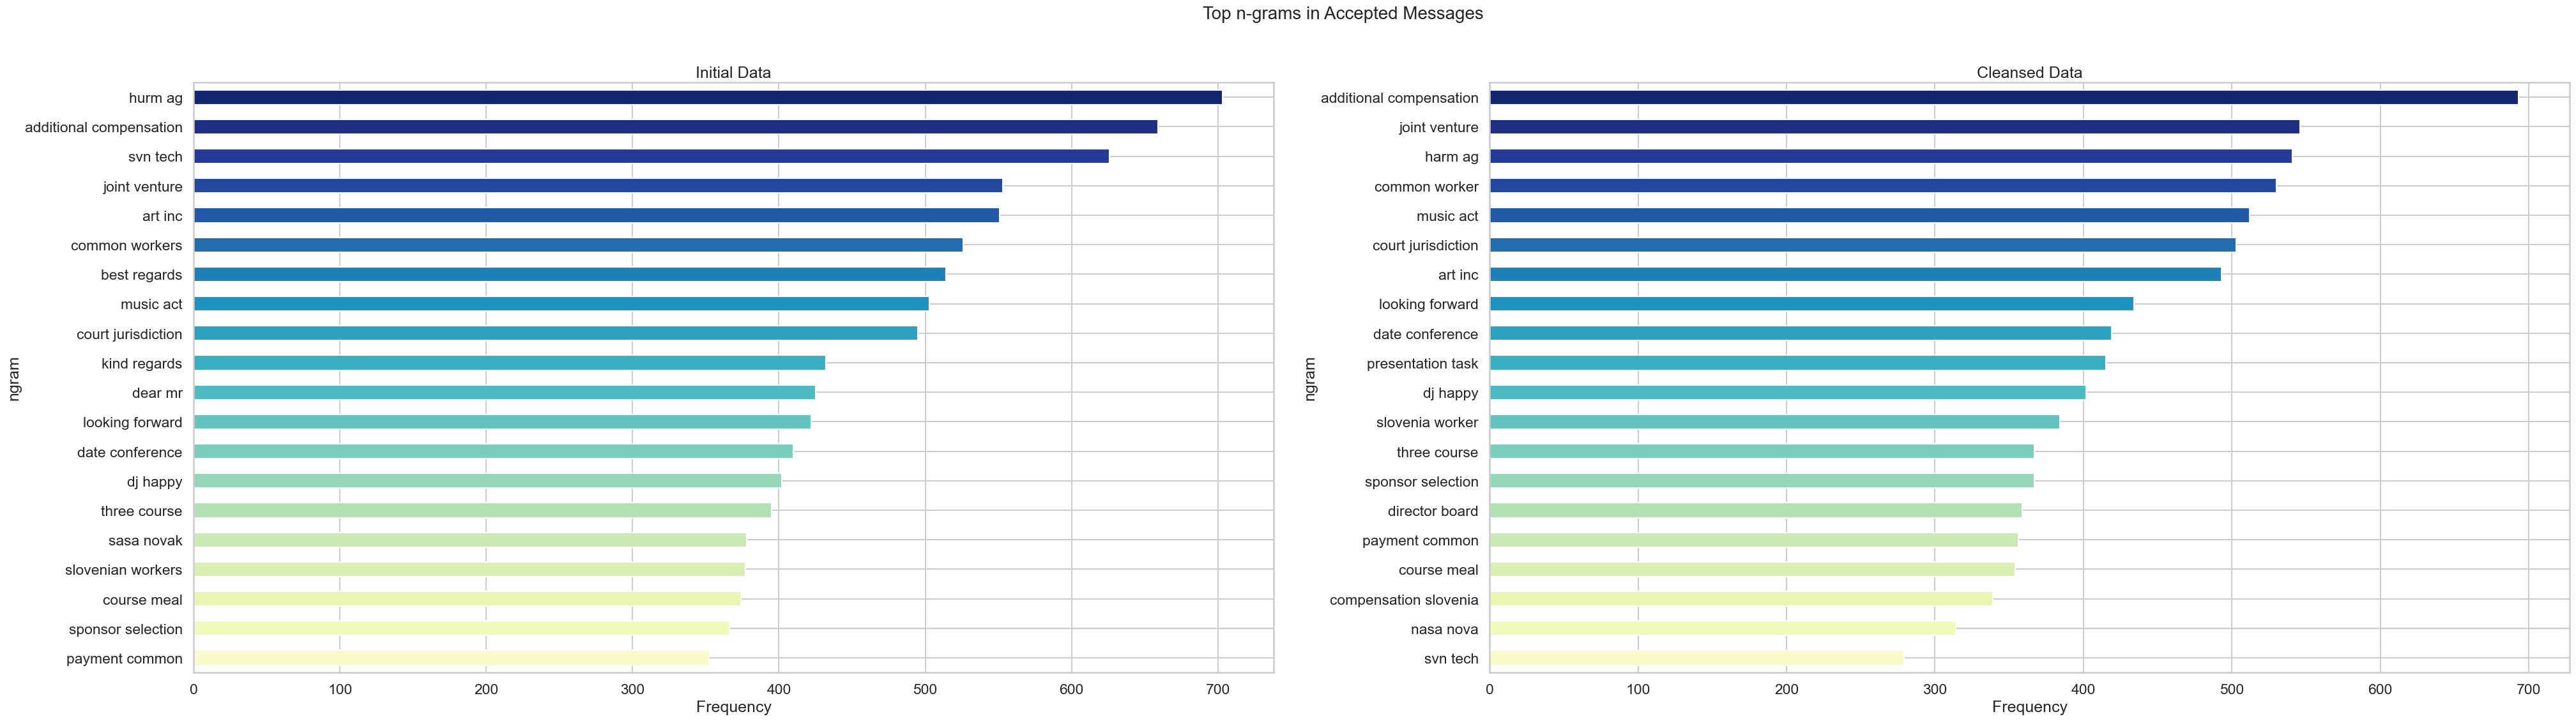

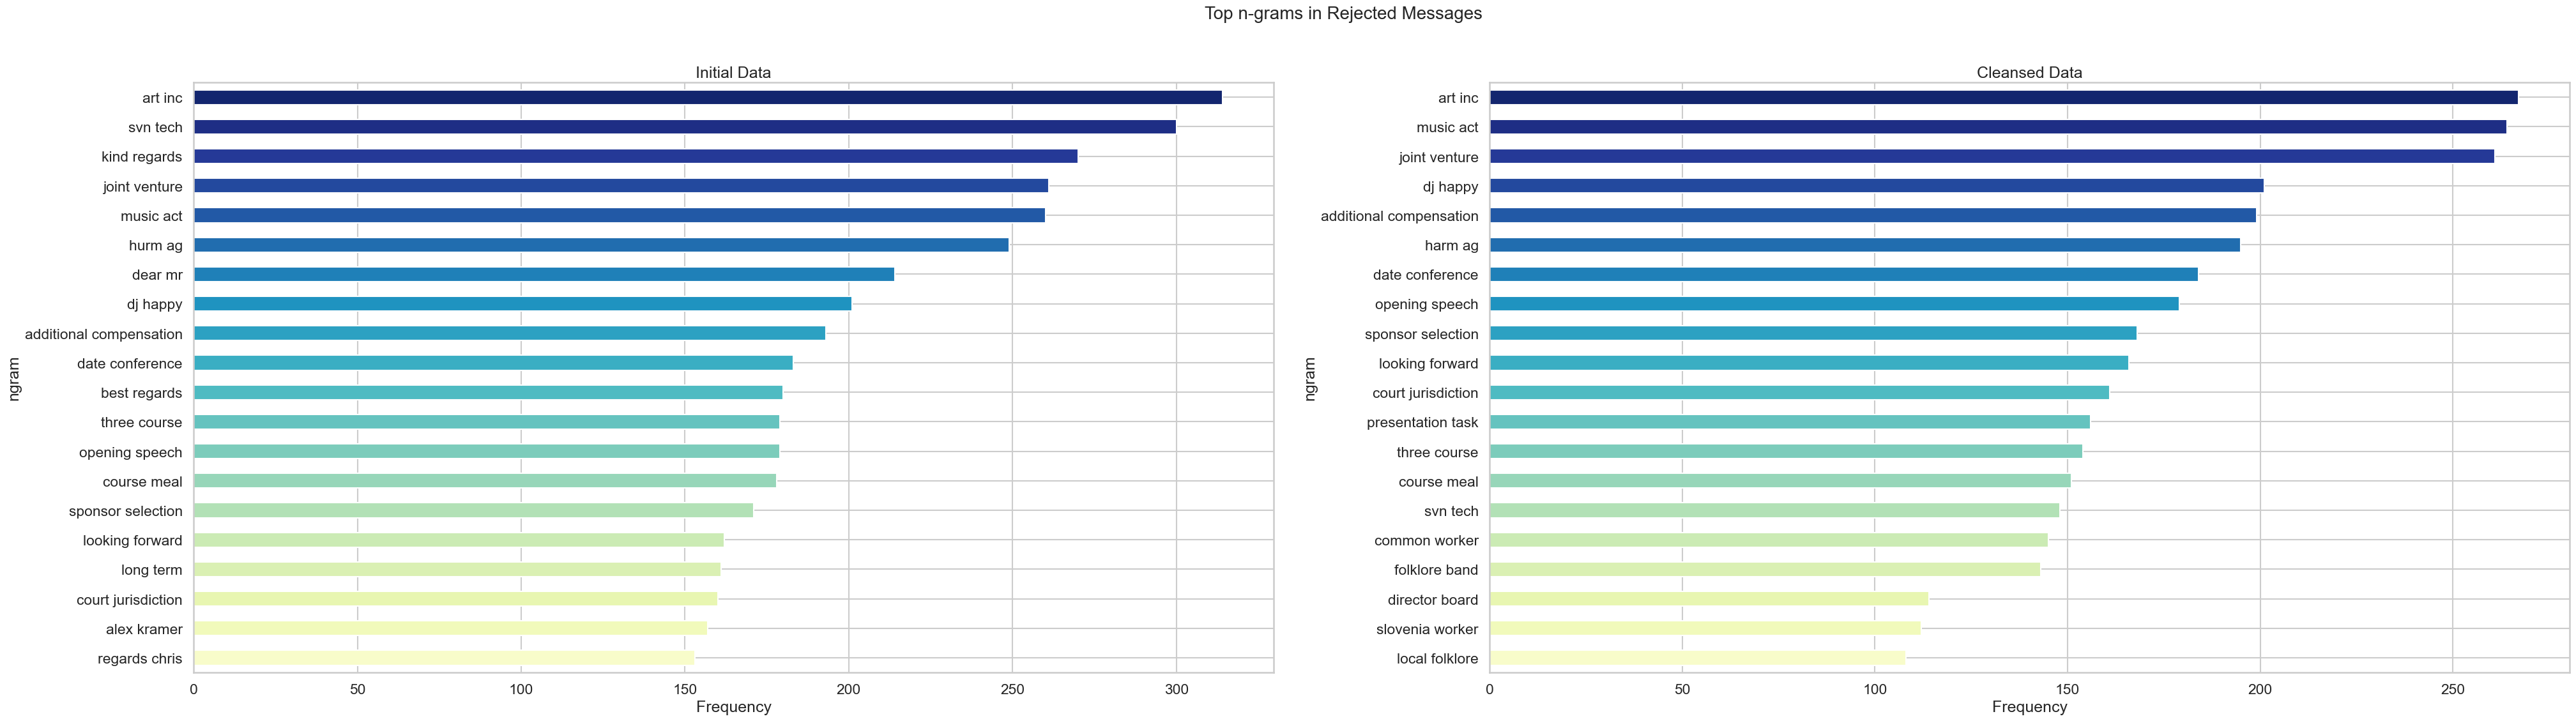

In [40]:
# Use the functions and process both datasets
create_subplots(initial_data, cleansed_data, n=2)# adapt the n to look for bi,tri-grams etc.

<p style="text-align: justify;">
The chart shows the top 2-grams (frequent word pairs) in a text corpus. "hurm ag" and "svn tech" are the most common, followed by "art inc" and "additional compensation". The bigrams suggest themes related to business, legal matters (e.g., "joint venture," "court jurisdiction"), and formal communication ("kind regards," "best regards"). These observations align with the previous data, indicating that organizations like HURM and openings like "Dear Mr/Mrs" often come together with closings like "best regards". It may be smart to exclude these common phrases since they do not constitute a significant percentage of the data and could bias the results if considered as parameters in our variables.
</p>

Before pre-processing, the data contained several prominent n-grams such as <span style="color: teal;">"hurm ag," "additional compensation," "svn tech," "art inc"</span>. However, there were also many noisy entries like <span style="color: teal;">"sasa novak," "three course," "dear mr," "kind regards"</span>, which added little analytical value. Additionally, redundancy and noise were evident with n-grams like <span style="color: teal;">"dear mr," "regards chris," "alex kramer," "three course"</span>.

After pre-processing, the data showed a significant improvement in clarity and relevance. Prominent n-grams shifted to more meaningful phrases such as <span style="color: teal;">"additional compensation," "joint venture," "common worker"</span>. Noise was effectively removed, eliminating terms like <span style="color: teal;">"sasa novak," "three course," "kind regards," "dear mr"</span>. The focus was added to contextually relevant phrases like <span style="color: teal;">"presentation task," "payment common," "local folklore"</span>. Prominent n-grams in the rejected messages also improved, highlighting terms like <span style="color: teal;">"art inc," "joint venture," "music act," "dj happy"</span>. Noise reduction was evident with the removal of <span style="color: teal;">"alex kramer," "regards chris," "kind regards," "dear mr"</span>, and contextual clarity was enhanced with phrases like <span style="color: teal;">"sponsor selection," "folklore band"</span>.

### Key Changes
- Removal of generic greetings and names
- Retention of core n-grams with clearer context-specific phrases
- Improved thematic balance with terms like <span style="color: teal;">"local folklore," "presentation task"</span>
- Overall Pre-Processing Impact
- Enhanced relevance of terms like <span style="color: teal;">"compensation worker," "joint venture"</span>
- Removal of irrelevant names and phrases
- Improved clarity by excluding generic greetings and closings
- Noise reduction by removing names, greetings, and formalities
- Improved focus on thematic and contextually relevant n-grams
- Reduction of redundancy and irrelevant phrases

Core terms like <span style="color: teal;">"joint venture," "art inc," "music act"</span> remained consistent
Thematic relevance of accepted and rejected messages persisted, showing preprocessing did not distort the content and that the issues that are being handled in the negotiation are mostly covered around compensations, joint ventures, dsirector board etc.

To conclude, specific linguistic patterns function in the context of negotiations, offering valuable insights into the field of pragmatics. It highlights that language is not just a means of exchanging information but also a powerful tool for taking action and influencing outcomes.

In essence, our findings are evidence that language plays an active role in shaping negotiation processes. By identifying these patterns we see the importance of these underlying issues that  guide the direction of the conversation, aligning with the core principles of speech act theory (Searle et. al 1980).

## **<span style="color: orange;"> Named Entity Recognitions </span>**

In [41]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
#donwload the model separetely so it can be imported in the next cell
!python -m spacy download en_core_web_sm  


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
     ---------------------------------------- 0.2/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.4/12.8 MB 2.7 MB/s eta 0:00:05
     - -------------------------------------- 0.6/12.8 MB 2.8 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/12.8 MB 3.3 MB/s eta 0:00:04
     --- ------------------------------------ 1.1/12.8 MB 3.5 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/12.8 MB 3.8 MB/s eta 0:00:04
     ---- ----------------------------------- 1.5/12.8 MB 3.8 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 4.0 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.8 MB 4.2 MB/s eta 0:00:03
     ------ --------------------------------- 2.2/12.8 MB 4.2 MB/


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
# Named entity recognition
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("Model loaded successfully!")

Model loaded successfully!


In [44]:
import spacy
from spacy import displacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Visualize named entities
def visualize_named_entities(text, dataset_name):
    """
    Process the text and visualize named entities using spaCy's displacy.
    """
    doc = nlp(text)
    print(f"Visualizing named entities for {dataset_name}")
    displacy.render(doc, style="ent", jupyter=True)

# Example usage: Visualize NER for a sample message from both datasets
sample_text_initial = initial_data['Content'].iloc[0]  # Adjust column name if needed
visualize_named_entities(sample_text_initial, "Initial Data")


spaCy model loaded successfully!
Visualizing named entities for Initial Data


c:\Users\TColt\AppData\Local\Programs\Python\Python312\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


In [45]:
sample_text_cleansed = cleansed_data['Content'].iloc[0]  # Adjust column name if needed
visualize_named_entities(sample_text_cleansed, "Cleansed Data")

Visualizing named entities for Cleansed Data


c:\Users\TColt\AppData\Local\Programs\Python\Python312\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


<p style="text-align: justify;">
Before pre-processing, the text contained personal names like <span style="color: teal;">"Mr. Mendel," "Sasa Novak"</span> and formal phrases such as <span style="color: teal;">"Dear Mr.," "kind regards"</span>. These names and formalities were present, adding unnecessary length and reducing the relevance of the content. After pre-processing, these names and formalities were removed, resulting in a more concise and relevant text.

The text before pre-processing also included specific instances and repetitive phrases like <span style="color: teal;">"sasa novak," "three course," "dear mr," "kind regards"</span>. These noisy entries detracted from the overall clarity and focus of the content. After pre-processing, these noisy entries were removed, allowing the text to focus on more relevant content.

Initially, the text featured terms like <span style="color: teal;">"hurm ag," "svn tech," "art inc"</span>, which were less contextually relevant. After pre-processing, the focus shifted to more meaningful phrases such as <span style="color: teal;">"additional compensation," "joint venture," "common worker"</span>, enhancing the overall relevance of the text.

Before pre-processing, the text contained redundant and non-informative n-grams like <span style="color: teal;">"dear mr," "regards chris," "alex kramer," "three course"</span>. These were removed during pre-processing, which improved the clarity and relevance of the text.

Finally, the text before pre-processing included general phrases and names that added little analytical value. After pre-processing, contextually relevant phrases like <span style="color: teal;">"sponsor selection," "folklore band"</span> became more prominent, improving the overall thematic relevance and making the text more focused and informative.
</p>

In [46]:
from collections import defaultdict

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Extract entities from all rows
def extract_entities_from_dataset(dataset, dataset_name):
    """
    Extract named entities from a dataset and group them by type.
    """
    all_entities = defaultdict(list)
    total_words = 0
    for text in dataset['Content']:
        doc = nlp(text)
        total_words += len(doc)
        for ent in doc.ents:
            all_entities[ent.label_].append(ent.text)
    return all_entities, total_words

spaCy model loaded successfully!


Here we can see all of identified named entities in the negotiation messages.

In [47]:
# Process both datasets
entities_initial, total_words_initial = extract_entities_from_dataset(initial_data, "Initial Data")
entities_cleansed, total_words_cleansed = extract_entities_from_dataset(cleansed_data, "Cleansed Data")


In [48]:
# Convert entities to a DataFrame for better readability
def convert_entities_to_df(entities):
    entity_summary = {entity_type: list(set(entity_list)) for entity_type, entity_list in entities.items()}
    entity_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in entity_summary.items()]))
    return entity_df

entity_df_initial = convert_entities_to_df(entities_initial)
entity_df_cleansed = convert_entities_to_df(entities_cleansed)

In [49]:
# Display the extracted entities grouped by type for initial
print("Entities in Initial Data:")
print(entity_df_initial)

Entities in Initial Data:
                           PERSON              NORP  \
0         Finn Mendel \n  \n  \n      East-European   
1                   Finn Mendel           Slovakian   
2                     Fill Mendel            Suisse   
3    la comprensión de mi actitud  Western European   
4                 Chris Hemsworth             Asian   
..                            ...               ...   
911                           NaN               NaN   
912                           NaN               NaN   
913                           NaN               NaN   
914                           NaN               NaN   
915                           NaN               NaN   

                             ORG  ORDINAL   CARDINAL  \
0                            ISA     50th        2:3   
1    the University of Lucerne (  firstly       half   
2              the Delivery Time     06th         1x   
3      the Court of Jurisdiction   Fourth  over half   
4                       Freelife 

In [50]:
# Display the extracted entities grouped by type for cleansed
print("\nEntities in Cleansed Data:")
print(entity_df_cleansed)


Entities in Cleansed Data:
                                  ORG      PRODUCT   ORDINAL  \
0     unwise point court jurisdiction         nova   firstly   
1                          meyer time  isa comfort     first   
2                   art inc supported          NaN    second   
3         certainty isa long time isa          NaN  secondly   
4    art inc ha partner isa many year          NaN     third   
..                                ...          ...       ...   
539                               NaN          NaN       NaN   
540                               NaN          NaN       NaN   
541                               NaN          NaN       NaN   
542                               NaN          NaN       NaN   
543                               NaN          NaN       NaN   

                        DATE                            LOC             NORP  \
0                message day  western europe eastern europe    east european   
1    accept additional month               

In [51]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Define the ner function
def ner(text):
    """
    Extract named entity labels from a given text.
    """
    doc = nlp(text)
    return [X.label_ for X in doc.ents]

spaCy model loaded successfully!


In [52]:
# Function to process and visualize named entities for a dataset
def process_and_visualize_entities(df, dataset_name):
    # Apply the ner function to the 'Content' column and flatten the results
    ent = df['Content'].apply(lambda x: ner(x))
    ent = [x for sub in ent for x in sub]  # Flatten the list of lists

    # Count the occurrences of each entity type
    counter = Counter(ent)
    count = counter.most_common()

    # Calculate the total number of entities
    total_entities = sum(counter.values())

    # Print the entity types with their percentages
    print(f"\nEntity Types in {dataset_name}")
    print("Entity Type\tFrequency\tPercentage")
    for entity, freq in count:
        percentage = (freq / total_entities) * 100
        print(f"{entity}\t{freq}\t{percentage:.2f}%")

    # Visualize the entity frequencies
    x, y = map(list, zip(*count))  # Unzip the entity labels and their counts
    percentages = [(freq / total_entities) * 100 for freq in y]  # Calculate percentages

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=y, y=x, palette="YlGnBu")

    # Add percentages on the bars
    for i, (freq, percentage) in enumerate(zip(y, percentages)):
        ax.text(freq, i, f'{percentage:.2f}%', va='center', fontsize=12)

    plt.xlabel('Frequency')
    plt.ylabel('Entity Type')
    plt.title(f'Named Entity Frequency in {dataset_name}')
    plt.show()


Entity Types in Initial Data
Entity Type	Frequency	Percentage
ORG	6048	23.13%
PERSON	4869	18.62%
DATE	4091	15.65%
CARDINAL	3049	11.66%
GPE	2583	9.88%
NORP	1840	7.04%
ORDINAL	1605	6.14%
PERCENT	1115	4.26%
WORK_OF_ART	239	0.91%
TIME	204	0.78%
LOC	171	0.65%
LAW	109	0.42%
PRODUCT	103	0.39%
EVENT	55	0.21%
MONEY	26	0.10%
FAC	16	0.06%
QUANTITY	15	0.06%
LANGUAGE	9	0.03%


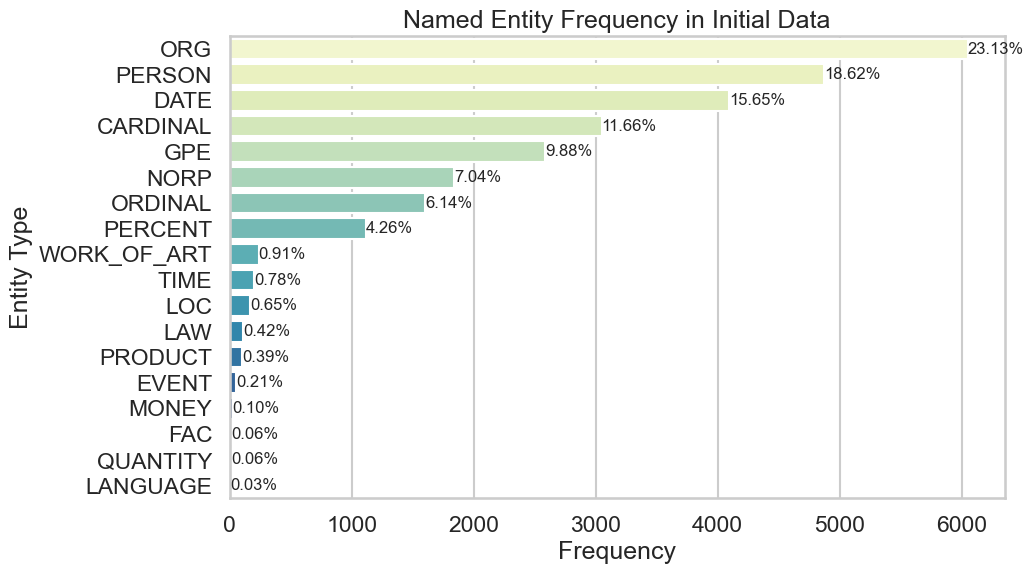

In [53]:
# Process and visualize entities for both datasets
process_and_visualize_entities(initial_data, "Initial Data")


Entity Types in Cleansed Data
Entity Type	Frequency	Percentage
DATE	2718	27.99%
CARDINAL	1995	20.54%
ORDINAL	1400	14.42%
ORG	1268	13.06%
NORP	661	6.81%
GPE	554	5.70%
LOC	466	4.80%
PRODUCT	264	2.72%
PERSON	207	2.13%
TIME	149	1.53%
PERCENT	11	0.11%
FAC	8	0.08%
LANGUAGE	8	0.08%
LAW	2	0.02%
QUANTITY	1	0.01%


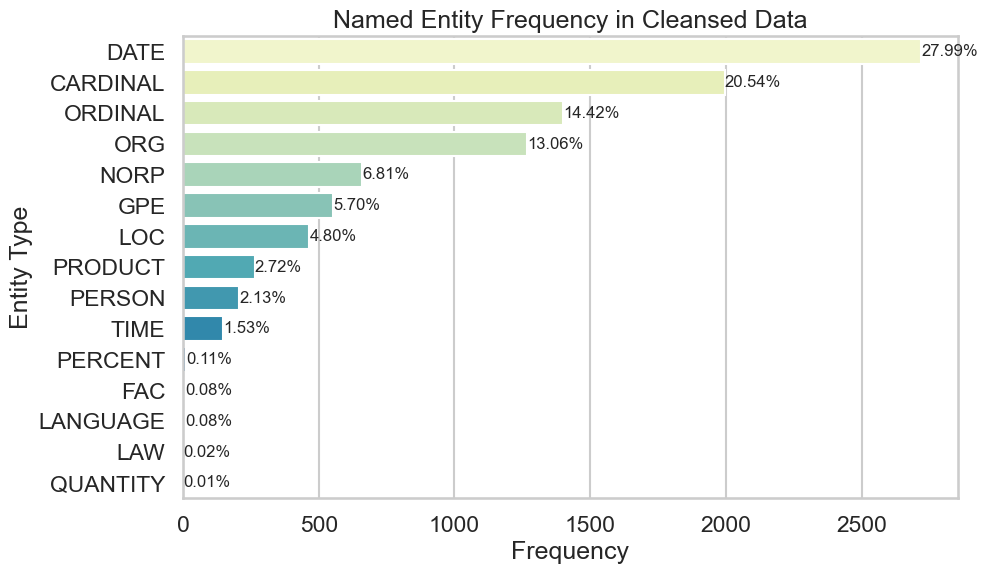

In [54]:
process_and_visualize_entities(cleansed_data, "Cleansed Data")

<p style="text-align: justify;">
In the initial data, the most frequent entities were <span style="color: teal;">ORG (23.14%)</span> and <span style="color: teal;">PERSON (18.61%)</span>, followed by <span style="color: teal;">DATE (15.65%)</span>, <span style="color: teal;">CARDINAL (11.64%)</span>, and <span style="color: teal;">GPE (9.88%)</span>. The dataset contained noise from rare and irrelevant entities like <span style="color: teal;">WORK_OF_ART</span> and <span style="color: teal;">LANGUAGE (<1%)</span> and an excessive frequency of <span style="color: teal;">PERSON</span>, adding irrelevant names.

After preprocessing, <span style="color: teal;">ORG</span> became the dominant entity (<span style="color: teal;">37.20%</span>), with significant increases in relevance for <span style="color: teal;">DATE (14.02%)</span>, <span style="color: teal;">LOC (11.11%)</span>, and <span style="color: teal;">PRODUCT (8.26%)</span>. Noise was reduced by removing rare categories, and <span style="color: teal;">PERSON</span> frequency dropped to <span style="color: teal;">5.08%</span>. The cleansed dataset focused on meaningful entities while reducing irrelevant ones, improving domain-specific relevance and clarity.
</p>

## **<span style="color: orange;"> Part-of-Speech </span>**
Part-of-Speech (POS) tagging to analyze the distribution of various grammatical categories (e.g., nouns, verbs, adjectives) in the text data with SpaCy

In [55]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Define a function to extract POS tags
def get_pos_tags(text):
    """
    Extract Part-of-Speech (POS) tags from text.
    """
    doc = nlp(text)
    return [token.pos_ for token in doc]

spaCy model loaded successfully!


In [56]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Define a function to extract POS tags
def get_pos_tags(text):
    """
    Extract Part-of-Speech (POS) tags from text.
    """
    doc = nlp(text)
    return [token.pos_ for token in doc]

# Function to process and visualize POS tags for a dataset
def process_and_visualize_pos_tags(df, dataset_name):
    # Apply the POS tagging function to the text data
    pos_tags = df['Content'].apply(lambda x: get_pos_tags(x))

    # Flatten the list of lists into a single list of POS tags
    pos_tags = [tag for sublist in pos_tags for tag in sublist]

    # Count the occurrences of each POS tag
    pos_counter = Counter(pos_tags)
    pos_counts = pos_counter.most_common()

    # Calculate the total number of POS tags
    total_pos_tags = sum(pos_counter.values())

    # Print the POS tags with their percentages
    print(f"\nPOS Tags in {dataset_name}")
    print("POS Tag\tFrequency\tPercentage")
    for pos_tag, freq in pos_counts:
        percentage = (freq / total_pos_tags) * 100
        print(f"{pos_tag}\t{freq}\t{percentage:.2f}%")

    # Prepare the data for visualization
    x, y = zip(*pos_counts)

    # Visualize the distribution of POS tags
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(x), y=list(y), palette="viridis")

    # Add percentages next to the bars with smaller font size
    for i, (pos, freq) in enumerate(pos_counts):
        percentage = (freq / total_pos_tags) * 100
        plt.text(i, freq, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

    plt.xlabel('Part of Speech')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Part-of-Speech Tags in {dataset_name}')
    plt.xticks(rotation=45)
    plt.show()

spaCy model loaded successfully!



POS Tags in Initial Data
POS Tag	Frequency	Percentage
NOUN	94568	15.40%
PRON	73010	11.89%
VERB	65972	10.75%
ADP	57230	9.32%
PUNCT	56118	9.14%
DET	48978	7.98%
ADJ	44194	7.20%
AUX	41338	6.73%
PROPN	29600	4.82%
ADV	29387	4.79%
PART	18704	3.05%
SCONJ	16523	2.69%
SPACE	14992	2.44%
CCONJ	14467	2.36%
NUM	7044	1.15%
INTJ	1293	0.21%
X	362	0.06%
SYM	153	0.02%


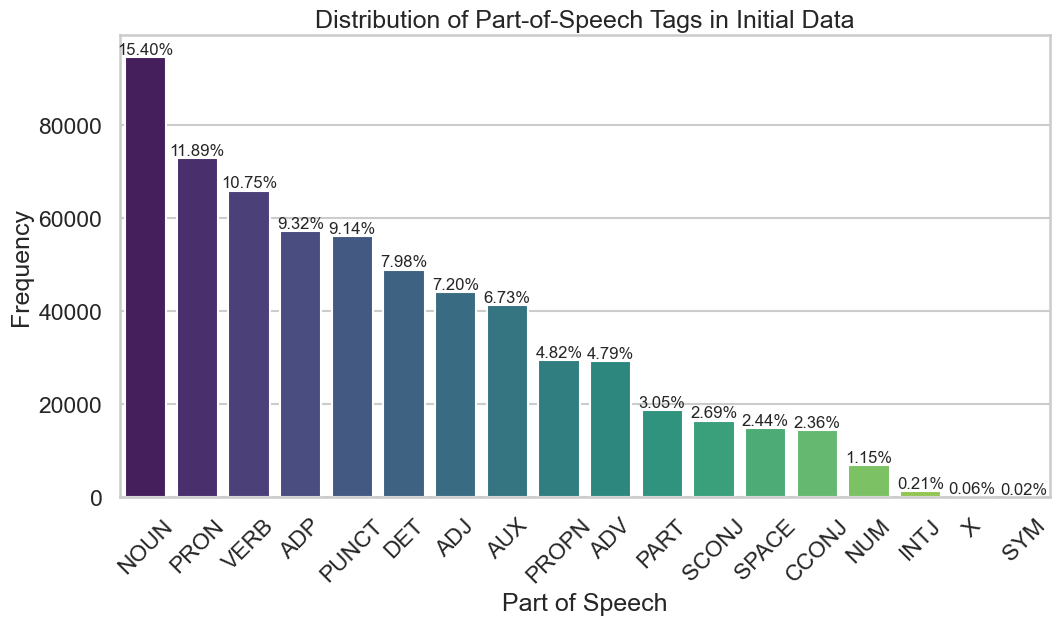

In [57]:
# Visualize the plots for combined POS tags before and after 
process_and_visualize_pos_tags(initial_data, "Initial Data")


POS Tags in Cleansed Data
POS Tag	Frequency	Percentage
NOUN	100905	40.96%
VERB	51676	20.98%
ADJ	39120	15.88%
ADV	19754	8.02%
PROPN	13334	5.41%
AUX	9330	3.79%
NUM	2517	1.02%
PRON	2322	0.94%
INTJ	1968	0.80%
ADP	1833	0.74%
SCONJ	1618	0.66%
PART	900	0.37%
DET	639	0.26%
CCONJ	321	0.13%
X	97	0.04%
PUNCT	4	0.00%
SYM	2	0.00%


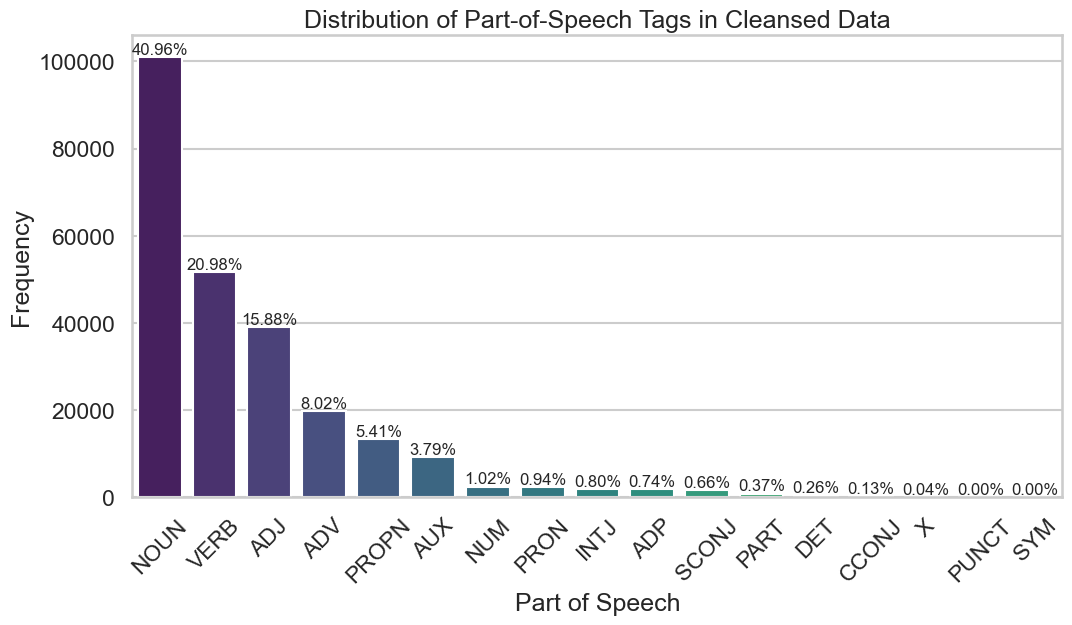

In [58]:
# Visualize the plots for combined POS tags before and after
process_and_visualize_pos_tags(cleansed_data, "Cleansed Data")

### **Before:**
In the initial data, <span style="color: teal; font-weight: bold;">nouns</span> were the most frequent part of speech, followed by <span style="color: teal; font-weight: bold;">pronouns</span>, <span style="color: teal; font-weight: bold;">verbs</span>, and <span style="color: teal; font-weight: bold;">adpositions</span>. <span style="color: teal; font-weight: bold;">Punctuation</span> and <span style="color: teal; font-weight: bold;">determiners</span> also contributed significantly, reflecting the unstructured nature of the text. <span style="color: teal; font-weight: bold;">Auxiliary verbs</span>, <span style="color: teal; font-weight: bold;">proper nouns</span>, and <span style="color: teal; font-weight: bold;">adjectives</span> appeared moderately, while <span style="color: teal; font-weight: bold;">conjunctions</span>, <span style="color: teal; font-weight: bold;">numbers</span>, and <span style="color: teal; font-weight: bold;">interjections</span> had minimal representation. Noise from <span style="color: teal; font-weight: bold;">punctuation</span> and <span style="color: teal; font-weight: bold;">symbols</span> diluted the analysis.

### **After:**
After cleansing, <span style="color: teal; font-weight: bold;">nouns</span> remained dominant, while <span style="color: teal; font-weight: bold;">verbs</span> and <span style="color: teal; font-weight: bold;">adjectives</span> gained prominence, reflecting a shift towards a focus on action and descriptive language. <span style="color: teal; font-weight: bold;">Pronouns</span> and <span style="color: teal; font-weight: bold;">punctuation</span> were reduced significantly, improving clarity. Rare tags like <span style="color: teal; font-weight: bold;">symbols</span> and <span style="color: teal; font-weight: bold;">space</span> were eliminated, streamlining the data. The cleansed dataset emphasizes meaningful content while reducing noise and irrelevant elements, enhancing its usability for downstream tasks.

The data cleansing process has significantly altered the distribution of part-of-speech (POS) tags, reflecting a more focused and semantically rich dataset. Here's an overview of the key changes:

<span style="color: teal; font-weight: bold;">Nouns (NOUN)</span>: The proportion of nouns increased from <span style="color: teal; font-weight: bold;">15.40%</span> in the initial dataset to <span style="color: teal; font-weight: bold;">40.96%</span> after cleansing. This sharp rise is attributed to the removal of less meaningful elements, such as stopwords and punctuation, leaving behind a higher concentration of substantively important words.

<span style="color: teal; font-weight: bold;">Verbs (VERB)</span> and <span style="color: teal; font-weight: bold;">Adjectives (ADJ)</span>: Verbs rose from <span style="color: teal; font-weight: bold;">10.75%</span> to <span style="color: teal; font-weight: bold;">20.98%</span>, while adjectives increased from <span style="color: teal; font-weight: bold;">7.20%</span> to <span style="color: teal; font-weight: bold;">15.88%</span>. These shifts underscore the retention of content that describes actions and attributes, which are critical in capturing the dynamics of negotiation discourse.

<span style="color: teal; font-weight: bold;">Pronouns (PRON)</span>: The frequency of pronouns dropped dramatically from <span style="color: teal; font-weight: bold;">11.89%</span> to <span style="color: teal; font-weight: bold;">0.94%</span>. This is expected, as pronouns generally carry less semantic weight in isolation and were deprioritized during the cleansing process.

<span style="color: teal; font-weight: bold;">Proper Nouns (PROPN)</span>: Despite removing named entities like organization and country names, proper nouns still account for <span style="color: teal; font-weight: bold;">5.41%</span> of the cleansed dataset, indicating that relevant entities or context-specific proper nouns were retained.

<span style="color: teal; font-weight: bold;">Punctuation (PUNCT)</span> and <span style="color: teal; font-weight: bold;">Determiners (DET)</span>: Punctuation saw a near-total reduction, dropping from <span style="color: teal; font-weight: bold;">9.14%</span> to almost <span style="color: teal; font-weight: bold;">0%</span>, while determiners (e.g., "the," "a") decreased significantly from <span style="color: teal; font-weight: bold;">7.98%</span> to <span style="color: teal; font-weight: bold;">0.26%</span>. These reductions reflect the removal of structural elements to focus on meaningful content.

### Explanation for the Frequency Changes
<span style="color: teal; font-weight: bold;">Normalization Effect</span>: By removing stopwords, punctuation, and other non-critical elements, the overall word count and tag diversity decreased. This normalization naturally increased the relative proportion of semantically valuable tags like nouns, verbs, and adjectives.

<span style="color: teal; font-weight: bold;">Focused Content</span>: The dataset was concentrated on substantive words that better capture the intent and meaning of negotiation messages, resulting in higher frequencies of critical POS tags.

### Relevance to Negotiation Literature
These changes align well with insights from negotiation studies, which highlight the importance of focusing on substantive contributions rather than filler or structural words. The increased emphasis on nouns, verbs, and adjectives reflects the need to understand the core themes, actions, and attributes discussed during negotiations. By enhancing the signal-to-noise ratio, the cleansed dataset provides a clearer representation of the negotiation discourse, improving both the interpretability and potential model performance.

## **<span style="color: orange;"> Sentiment Analysis  </span>**

In [59]:
!pip install textblob

In [60]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to calculate sentiment polarity
def calculate_sentiment(text):
    """
    Calculate the sentiment polarity of the text.
    """
    return TextBlob(text).sentiment.polarity

# Define a function to categorize sentiment into Positive, Negative, and Neutral
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Define a function to process sentiment for a dataset
def process_sentiment(df):
    # Apply the sentiment analysis function to the 'Content' column
    df['Sentiment'] = df['Content'].apply(calculate_sentiment)

    # Categorize sentiment into Positive, Negative, and Neutral
    df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

    return df


In [61]:
# Process sentiment for both datasets
initial_data = process_sentiment(initial_data)
cleansed_data = process_sentiment(cleansed_data)

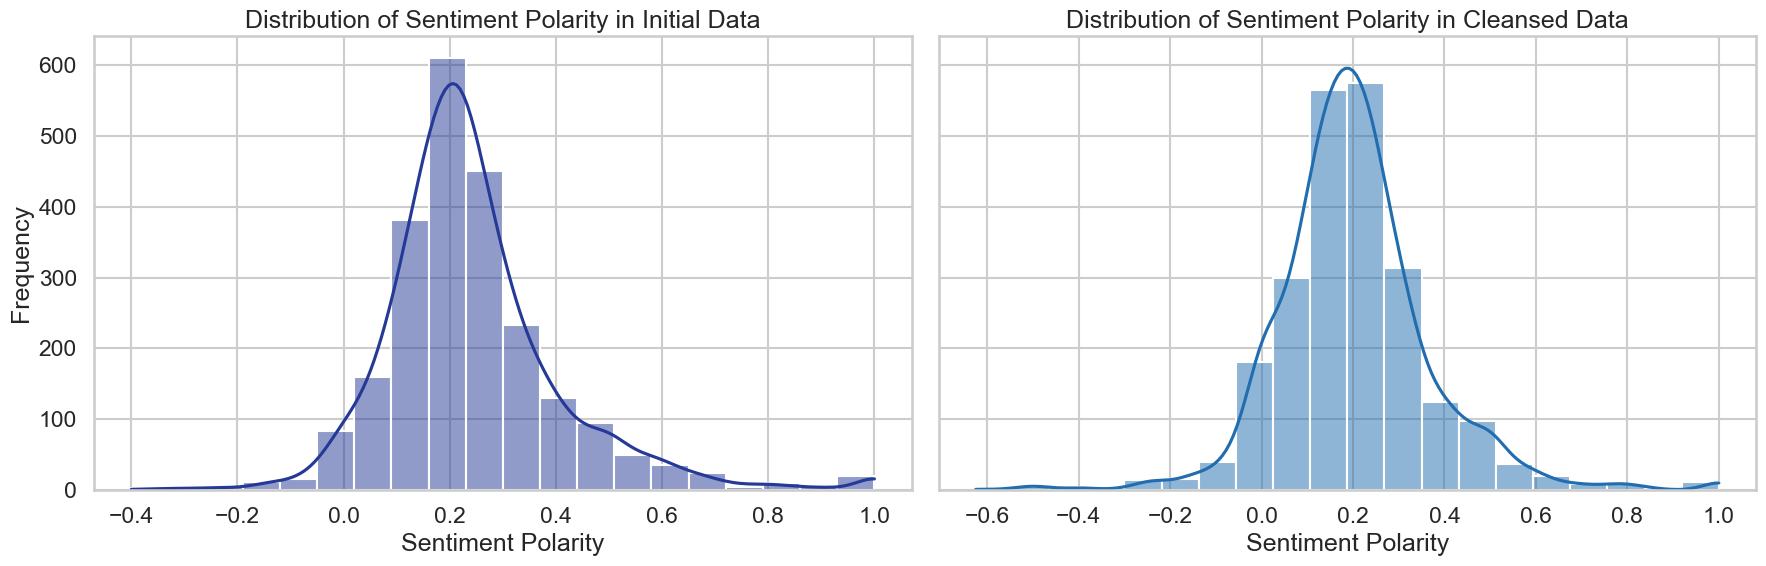

In [62]:
# Create subplots to visualize the distribution of sentiment polarity scores for both datasets
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Define the color palette and reverse it to start with darker colors
palette = sns.color_palette("YlGnBu")[::-1]

# Visualize the distribution of sentiment polarity scores for initial data
sns.histplot(ax=axes[0], data=initial_data['Sentiment'], bins=20, kde=True, color=palette[0])
axes[0].set_title('Distribution of Sentiment Polarity in Initial Data')
axes[0].set_xlabel('Sentiment Polarity')
axes[0].set_ylabel('Frequency')

# Visualize the distribution of sentiment polarity scores for cleansed data
sns.histplot(ax=axes[1], data=cleansed_data['Sentiment'], bins=20, kde=True, color=palette[1])
axes[1].set_title('Distribution of Sentiment Polarity in Cleansed Data')
axes[1].set_xlabel('Sentiment Polarity')

plt.tight_layout()
plt.show()

No big change visible in the polarity majority remains positive, graph still seems to be normally distributed and more densed than before.

In [63]:
# Function to process sentiment for a dataset
def process_sentiment(df):
    # Apply the sentiment analysis function to the 'Content' column
    df['Sentiment'] = df['Content'].apply(calculate_sentiment)

    # Categorize sentiment into Positive, Negative, and Neutral
    df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

    return df

In [64]:
# Process sentiment for both datasets
initial_data = process_sentiment(initial_data)
cleansed_data = process_sentiment(cleansed_data)

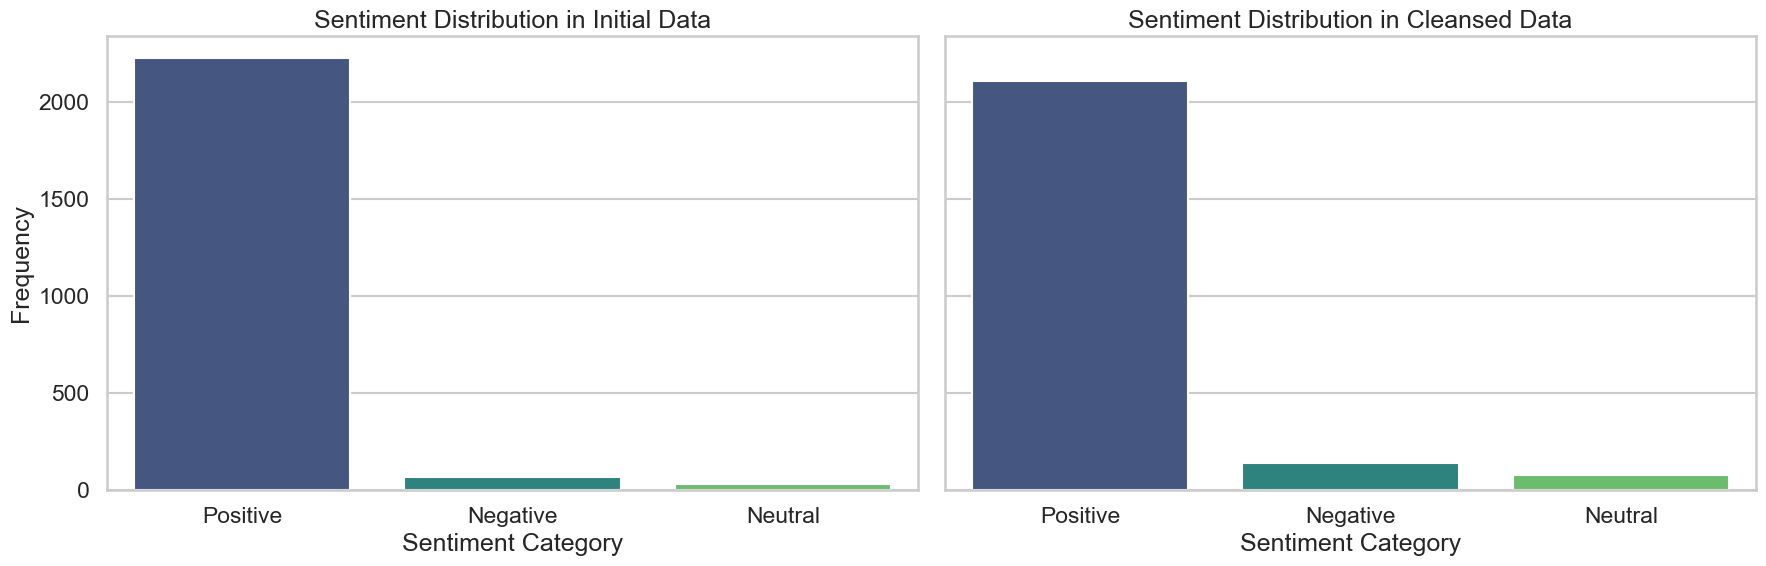

In [65]:
# Create subplots to visualize sentiment distribution for both datasets
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Visualize the sentiment distribution for initial data
sns.countplot(ax=axes[0], x='SentimentCategory', data=initial_data, palette='viridis')
axes[0].set_xlabel('Sentiment Category')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Sentiment Distribution in Initial Data')

# Visualize the sentiment distribution for cleansed data
sns.countplot(ax=axes[1], x='SentimentCategory', data=cleansed_data, palette='viridis')
axes[1].set_xlabel('Sentiment Category')
axes[1].set_title('Sentiment Distribution in Cleansed Data')

plt.tight_layout()
plt.show()

There is only a minor change since openings that included positive words like **<span style="color: teal;">"Dear"</span>** and closings like **<span style="color: teal;">"Best regards"</span>** were removed. The overall amount of positive words decreased, while the negative and neutral words remained the same in relevance. However, they appear to have bigger bars than before, even though there was no significant change.

In [66]:
# save cleansed data to xlsx
cleansed_data.to_excel("cleansed_data.xlsx", index=False)